# Đọc dữ liệu

In [70]:
file_name = r'F:\UEH\Năm 3\Lập trình phân tích dữ liệu\Cuối kỳ\Final-LTPTDL\graph.xlsx'

In [71]:
import pandas as pd

df_node = pd.read_excel(file_name,sheet_name='Nodes')
df_edge = pd.read_excel(file_name,sheet_name='Edges')

In [72]:
df_node.head()

,id,name_nodes,h
0,0,A,14
1,1,B,0
2,2,C,15
3,3,D,6
4,4,E,8


In [73]:
df_edge

,id,node_start,node_end,weight
0,0,A,C,9
1,1,A,F,20
2,2,A,D,7
3,3,A,E,13
4,4,C,H,6
5,5,D,H,8
6,6,D,E,4
7,7,E,K,4
8,8,E,I,3
9,9,F,I,6


In [74]:
p = [(2, 3),(2, -3),(0, 2),(1, 1),(2.5, 0.5),(3, 2),(3.2, 0.5),(0, -2),(2.5, -2),(1, -1.5)]

In [75]:
# (node start, node end , weight)

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(df_node,df_edge,direct = False):
    if direct:
        G = nx.DiGraph()
    else:
      G = nx.Graph()
    # Thêm các đỉnh
    nodes = df_node['name_nodes'].tolist()
    
    G.add_nodes_from(nodes)
    # Thêm các cạnh và trọng số
    edges = [(row['node_start'], row['node_end'], row['weight']) for _, row in df_edge.iterrows()]
    G.add_weighted_edges_from(edges)

    # Tọa độ của các đỉnh
    pos = {
        nodes[i]:p[i] for i in range(len(nodes))
    }
    return G,pos

In [77]:
graph,pos = create_graph(df_node,df_edge,direct=False)

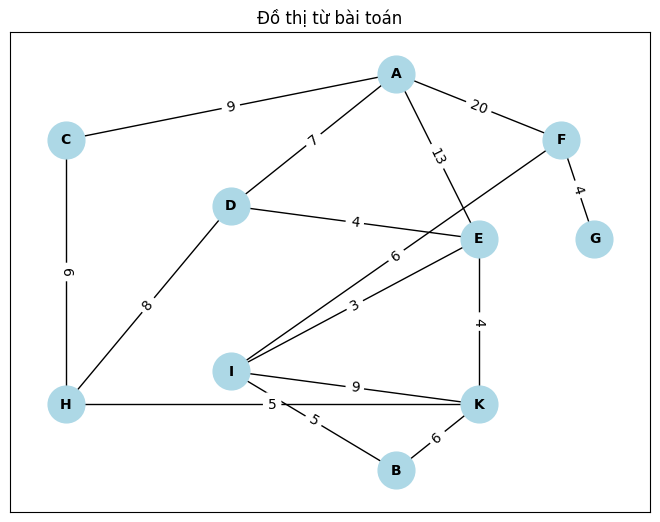

In [78]:
# Vẽ đồ thị
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Hiển thị đồ thị
plt.title("Đồ thị từ bài toán")
plt.axis('on')  # Giữ tỷ lệ giữa các trục
plt.show()


# Hàm trả về đường đi

In [79]:
def print_path(distances,start, end):
    # Lưu đường đi từ đích tới điểm bắt đầu
    path = []
    # Node đầu tiên là đích
    node = end
    # Duyệt cho tới khi về lại điểm bắt đầu
    while node != start:
        path.append(node)
    # Node tiếp theo là node có gần node trước đó
        node = distances[node][1]
    # Thêm node bắt đầu
    path.append(start)
    # Đảo ngược danh sách để có đường đi từ điểm bắt đầu tới đích
    path = [str(x) for x in path[::-1]]
    p = ' -> '.join(path)
    # Chi phí tới đỉnh đích
    cost = distances[end][0]
    print(f'Path: {p}')
    print(f'Cost: {cost}')
    return

In [80]:
p1 ={'A': (0, 'A'), 'B': (19, 'I'), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (float('inf'), None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}

In [81]:
' -> '.join(['B','I','E','D','A'][::-1])

'A -> D -> E -> I -> B'

In [82]:
c = p1['B'][0]
c

19

In [83]:
p1['D'][1]

'A'

In [84]:
print_path(p1,'A','B')

Path: A -> D -> E -> I -> B
Cost: 19


In [85]:
graph['A']['C']['weight']

9

In [86]:
[node for node in graph.neighbors('D')]

['A', 'H', 'E']

In [123]:
l = [(100, 'E'), (25, 'H'), (7, 'C'), (27, 'F')]
heapq.heapify(l)
l

[(7, 'C'), (25, 'H'), (100, 'E'), (27, 'F')]


In [109]:
heapq.heappop(l)

(7, 'C')

In [110]:
l

[(25, 'H'), (27, 'F'), (100, 'E')]

In [117]:
heapq.heappush(l,(8,'L'))

In [121]:
print(l)

[(27, 'F'), (80, 'M'), (100, 'E')]


In [119]:
heapq.heappop(l)

(8, 'L')

In [120]:
l

[(27, 'F'), (80, 'M'), (100, 'E')]

# Thuật toán Dijkstra

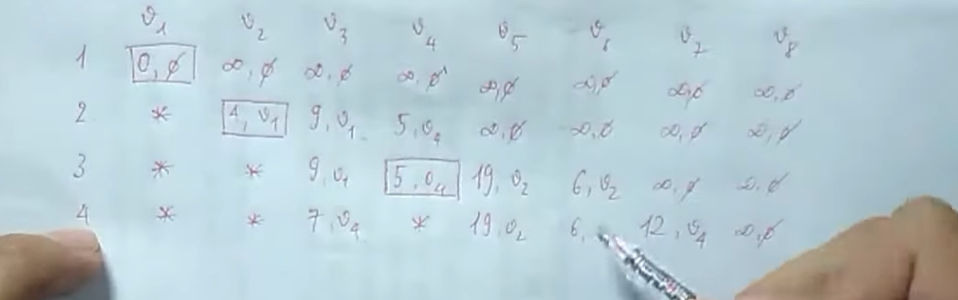

In [87]:
import heapq

def dijkstra(graph, start, end):
    # Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    L = {node: (float('infinity'), None) for node in graph.nodes}
    # Khoảng cách từ đỉnh bắt đầu đến chính nó là 0
    L[start] = (0, start)
    
    # Khởi tạo danh sách khoảng cách
    open_list = []
    heapq.heappush(open_list, (0 , start))  # f = g + h

    # Danh sách các đỉnh đã duyệt
    closed = set()  # Sử dụng set để kiểm tra nhanh hơn

    while open_list:
        # 5, A
        current_distance, current_node = heapq.heappop(open_list)
        closed.add(current_node)

        # Nếu đã đến đỉnh kết thúc, dừng lại
        if current_node == end:
            break

        # Duyệt qua các cạnh của đỉnh hiện tại
        for neighbor in graph.neighbors(current_node):
            if neighbor in closed:
                continue
            # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
            distance = current_distance + graph[current_node][neighbor]['weight']

            # Nếu khoảng cách mới nhỏ hơn khoảng cách đã tìm thấy, cập nhật
            if distance < L[neighbor][0]:
                L[neighbor] = (distance, current_node)
                #  tạo openlisst mới
                open_list = [(distance, neighbor) if node == neighbor else (f, node) for f, node in open_list]
                heapq.heappush(open_list, (distance, neighbor))
                heapq.heapify(open_list)

        print(L)
        print(open_list)
        print(closed)
        print('-' * 40)

    return L

In [88]:
o = [(18, 'C'), (19, 'C'), (45, 'E'), (30, 'G')]

In [89]:
for f,node in o:
    if node == n:
        print(40,n)
    else:
        print(f,node)

18 C
19 C
40 E
30 G


In [90]:
n = 'E' # 40,E
[(40,'E') if node == n else (f,node)  for f, node in o]

[(18, 'C'), (19, 'C'), (40, 'E'), (30, 'G')]

In [91]:
print_path(dijkstra(graph, 'A','B'),'A','B')

{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'F': (20, 'A'), 'G': (inf, None), 'H': (inf, None), 'K': (inf, None), 'I': (inf, None)}
[(7, 'D'), (13, 'E'), (9, 'C'), (20, 'F')]
{'A'}
----------------------------------------
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(9, 'C'), (11, 'E'), (20, 'F'), (15, 'H'), (11, 'E')]
{'A', 'D'}
----------------------------------------
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(11, 'E'), (11, 'E'), (20, 'F'), (15, 'H')]
{'A', 'C', 'D'}
----------------------------------------
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
[(11, 'E'), (14, 'I'), (20, 'F'), (15, 

# A*

In [92]:
# Heuristic
h = df_node.set_index('name_nodes')['h'].to_dict()

In [93]:
h

{'A': 14,
 'B': 0,
 'C': 15,
 'D': 6,
 'E': 8,
 'F': 7,
 'G': 12,
 'H': 10,
 'K': 2,
 'I': 4}

In [94]:
g,pos = create_graph(df_node,df_edge,direct=True)

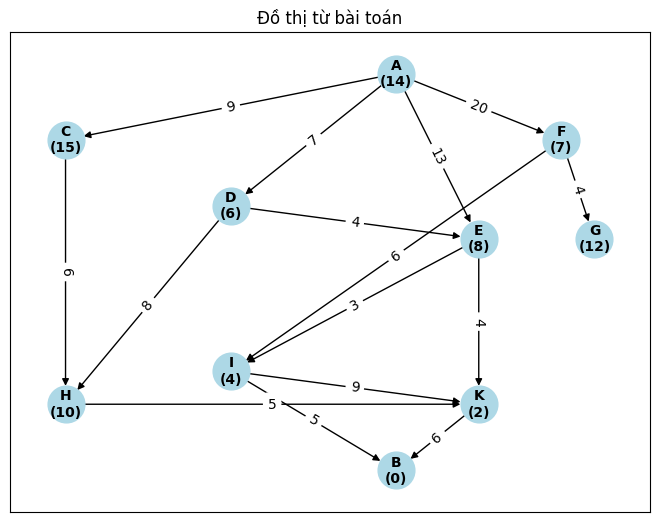

In [95]:
import matplotlib.pyplot as plt
import networkx as nx

# Vẽ đồ thị
nx.draw(g, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

# Thêm nhãn cho các đỉnh, bao gồm cả heuristic
node_labels = {node: f"{node}\n({h[node]})" for node in h.keys()}
nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=10, font_weight='bold')

# Vẽ nhãn cho các cạnh
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

# Hiển thị đồ thị
plt.title("Đồ thị từ bài toán")
plt.axis('on')  # Giữ tỷ lệ giữa các trục
plt.show()


In [96]:
def Astar(graph,start,end,heuristic):
# Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    g_distances = {node: (float('inf'), None) for node in graph.nodes}
    g_distances[start] = (0, start)  # Khoảng cách từ start đến chính nó
    # Khởi tạo danh sách trạng thái
    open_list = []
    # Danh sách các đỉnh đã duyệt
    closed_list = set()
    # Thêm nút bắt đầu vào open_list
    heapq.heappush(open_list, (0 + heuristic[start], start))  # f = g + h
    
    while open_list:
      # Chọn node trong open list
        current_f,current_node = heapq.heappop(open_list)
      # Di chuyển node vào closed list
        closed_list.add(current_node)
        print(current_node, current_f)

        if current_node == end:
            print(open_list)
            print(g_distances)
            print('-'*40)
            print('Đã tìm thấy đường đi:')
            print_path(distances=g_distances,start=start,end=end)
            break
        else:
            for neighbor in graph.neighbors(current_node):
            # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
                # g(v) = g(u)+(u,v)
              g = g_distances[current_node][0] + graph[current_node][neighbor]['weight']
              h = heuristic[neighbor]
              # f(v) = g(v) + h(v)
              f = g + h  
              if neighbor in [node for node in closed_list]:
                 # Nếu nút nằm trong closed_list thì bỏ qua
                 continue
              # Kiểm tra xem node(v) kề có nằm trong open_list hay chưa
              if neighbor not in [node for _, node in open_list]: # chưa
              # Thêm node kề và f vào
                heapq.heappush(open_list,(f,neighbor))
              # Lưu lại g(v)
                g_distances[neighbor] = (g,current_node)
              else:
                # Nếu node(v) trong open_list
                # Nều mà g(v) mới tốt hơn (bé hơn) g(v) cũ thì cập nhật
                if g < g_distances[neighbor][0]:
                    g_distances[neighbor] = (g, current_node)
                    # Cập nhật lại f trong open_list
                    # Không thể cập nhật f trực tiếp, cần xóa và thêm lại
                    open_list = [(f, neighbor) if node == neighbor else (f_node, node) for f_node, node in open_list]
                    # Gọi heapq.heapify() để tái cấu trúc danh sách thành heap
                    heapq.heapify(open_list)
        if not open_list:
            print('Không tìm thấy đường đi:')
            break
        print(open_list) # lưu f()
        print(g_distances) # lưu g()
        print('-'*40)
    return

In [97]:
Astar(g, 'A','B',h)

A 14
[(13, 'D'), (21, 'E'), (24, 'C'), (27, 'F')]
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'F': (20, 'A'), 'G': (inf, None), 'H': (inf, None), 'K': (inf, None), 'I': (inf, None)}
----------------------------------------
D 13
[(19, 'E'), (25, 'H'), (24, 'C'), (27, 'F')]
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
----------------------------------------
E 19
[(17, 'K'), (18, 'I'), (27, 'F'), (25, 'H'), (24, 'C')]
{'A': (0, 'A'), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
----------------------------------------
K 17
[(18, 'I'), (21, 'B'), (27, 'F'), (25, 'H'), (24, 'C')]
{'A': (0, 'A'), 'B': (21, 'K'), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}